### Understanding Data

#### Downloading Dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import networkx as nx     # ! pip install networkx==2.6.3
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
zip_file = keras.utils.get_file(
    fname = 'cora.tgz',
    origin = "https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
    extract = True,
)

data_dir = os.path.join(os.path.dirname(zip_file), 'cora')

168052/168052 [==============================] - 0s 1us/step


In [ ]:
data_dir

'/root/.keras/datasets/cora'

In [ ]:
citation_data = pd.read_csv(
    os.path.join(data_dir, 'cora.cites'),
    sep = '\t',
    header = None,
    names = ['target', 'source'],
)
citation_data.head()

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960


In [ ]:
citation_data.describe()

,target,source
count,5429.000000,5.429000e+03
mean,115009.455148,5.604759e+05
std,188229.783205,4.710471e+05
min,35.000000,3.500000e+01
25%,6334.000000,7.855200e+04
50%,31353.000000,5.233940e+05
75%,119686.000000,1.113995e+06
max,954315.000000,1.155073e+06


In [ ]:
citation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  5429 non-null   int64
 1   source  5429 non-null   int64
dtypes: int64(2)
memory usage: 85.0 KB


In [ ]:
column_names = ['paper_id'] + [f"term_{idx}" for idx in range(1433)] + ['subject']
papers_data = pd.read_csv(
    os.path.join(data_dir, 'cora.content'),
    sep = '\t',
    header = None,
    names = column_names,
)

papers_data.head()

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,...,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [ ]:
print("Paper shape: ", papers_data.shape)

Paper shape:  (2708, 1435)


### Encoding paper_id & subject

In [ ]:
class_values = sorted(papers_data['subject'].unique())
class_idc = {name: id for id, name in enumerate(class_values)}
paper_idc = {name: id for id, name in enumerate(sorted(papers_data['paper_id'].unique()))}

papers_data["paper_id"] = papers_data["paper_id"].apply(lambda name: paper_idc[name])
citation_data["source"] = citation_data["source"].apply(lambda name: paper_idc[name])
citation_data["target"] = citation_data["target"].apply(lambda name: paper_idc[name])
papers_data["subject"] = papers_data["subject"].apply(lambda value: class_idc[value])

### Visualizing Data

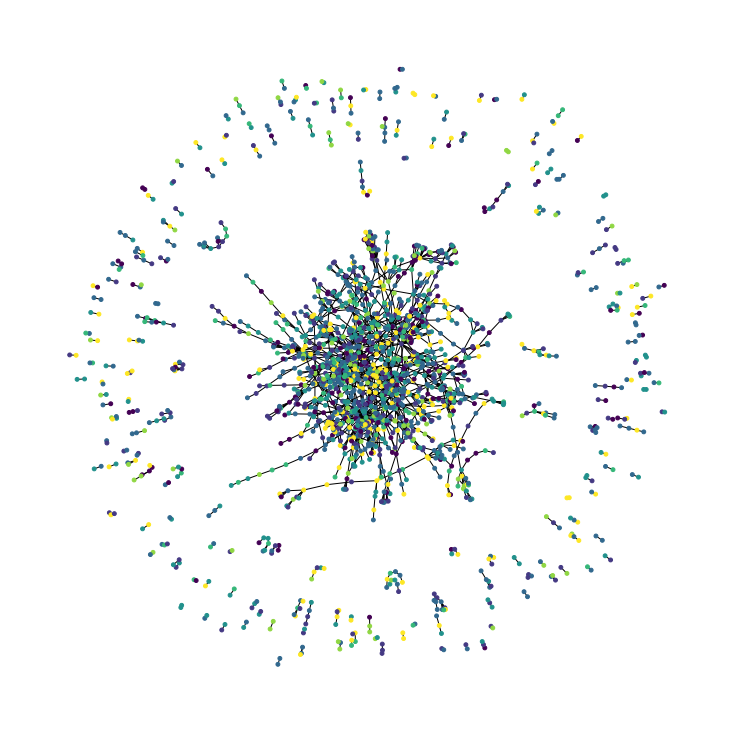

In [ ]:
plt.figure(figsize=(10, 10))
colors = papers_data['subject'].tolist()
cora_graph = nx.from_pandas_edgelist(citation_data.sample(n = 2000))
subjects = list(papers_data[papers_data['paper_id'].isin(list(cora_graph.nodes))]['subject'])
nx.draw_spring(cora_graph, node_size = 15, node_color=subjects)

### Making Graph Data

In [ ]:
import tensorflow as tf
feature_names = set(papers_data.columns) - {"paper_id", "subject"}
feature_names

{'term_555',
 'term_191',
 'term_383',
 'term_1058',
 'term_1020',
 'term_170',
 'term_639',
 'term_1139',
 'term_908',
 'term_1389',
 'term_1065',
 'term_230',
 'term_594',
 'term_729',
 'term_1285',
 'term_541',
 'term_72',
 'term_999',
 'term_256',
 'term_895',
 'term_1340',
 'term_1376',
 'term_513',
 'term_352',
 'term_977',
 'term_1039',
 'term_1208',
 'term_248',
 'term_55',
 'term_584',
 'term_303',
 'term_261',
 'term_1091',
 'term_520',
 'term_1414',
 'term_489',
 'term_643',
 'term_1258',
 'term_956',
 'term_243',
 'term_119',
 'term_233',
 'term_570',
 'term_138',
 'term_275',
 'term_698',
 'term_169',
 'term_743',
 'term_1273',
 'term_330',
 'term_612',
 'term_835',
 'term_175',
 'term_412',
 'term_1170',
 'term_203',
 'term_441',
 'term_264',
 'term_1327',
 'term_281',
 'term_881',
 'term_1104',
 'term_120',
 'term_438',
 'term_937',
 'term_1288',
 'term_1236',
 'term_391',
 'term_380',
 'term_890',
 'term_166',
 'term_411',
 'term_135',
 'term_586',
 'term_319',
 'term_1

In [ ]:
edges = citation_data[['source', 'target']].to_numpy().T
edges

array([[  21,  905,  906, ..., 2586, 1874, 2707],
       [   0,    0,    0, ..., 1874, 1876, 1897]])

In [ ]:
node_features = tf.cast(
    papers_data.sort_values("paper_id")[feature_names].to_numpy(),
    dtype = tf.dtypes.float32
)
node_features

<tf.Tensor: shape=(2708, 1433), dtype=float32, numpy=
array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
edge_weights = tf.ones(shape=edges.shape[1])
print("Edge Weight shape", edge_weights)

Edge Weight shape tf.Tensor([1. 1. 1. ... 1. 1. 1.], shape=(5429,), dtype=float32)


In [ ]:
y_class = papers_data["subject"]
y_class

0       2
1       5
2       4
3       4
4       3
       ..
2703    1
2704    1
2705    1
2706    0
2707    2
Name: subject, Length: 2708, dtype: int64

In [ ]:
num_classes = papers_data['subject'].nunique()
num_classes

7

In [ ]:
num_features = len(feature_names)
num_features

1433

In [ ]:
graph_info = (node_features, edges, edge_weights)

### Train-Test Split

In [ ]:
train_data, test_data = [], []

for _, group_data in papers_data.groupby("subject"):
  random_selection = np.random.rand(len(group_data.index)) <= 0.5
  train_data.append(group_data[])

### Modelling

In [ ]:
! pip install -q torch

In [ ]:
import torch
os.environ['TORCH'] = torch.__version__
os.environ['PYTHONWARNINGS'] = "ignore"

!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-lu0yhbu7
  Running command git clone -q https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-lu0yhbu7


In [ ]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(torch.nn.Module):
  def __init__(self, hidden_channels):
    super().__init__()
    torch.manual_seed(2056)
    self.conv1 = GCNConv(num_features, hidden_channels)
    self.conv2 = GCNConv(hidden_channels, num_classes)

  def forward(self, x, edge_index):
    x = self.conv1(x, edge_index)
    x = x.relu()
    x = F.dropout(x, p = 0.5, training=self.training)
    x = self.conv2(x, edge_index)
    return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


In [ ]:
node_features = torch.from_numpy(
    papers_data.sort_values("paper_id")[feature_names].to_numpy()
).type(torch.FloatTensor)
node_features

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
edges = torch.from_numpy(
    citation_data[['source', 'target']].to_numpy().T
).type(torch.LongTensor)
edges

tensor([[  21,  905,  906,  ..., 2586, 1874, 2707],
        [   0,    0,    0,  ..., 1874, 1876, 1897]])

In [ ]:
y_class = torch.from_numpy(
    papers_data["subject"].to_numpy()
)
y_class

tensor([2, 5, 4,  ..., 1, 0, 2])

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay = 5e-4)
criterian = torch.nn.CrossEntropyLoss()

def train():
  model.train()
  optimizer.zero_grad()
  out = model(node_features, edges)
  loss = criterian(out, y_class)
  loss.backward()
  optimizer.step()
  return loss

def test():
  model.eval()
  out = model(node_features, edges)
  pred = out.argmax(dim=1)
  test_correct = pred == y_class
  test_accuracy = int(test_correct.sum()) / len(y_class)
  return test_accuracy

epochs = 100
for epoch in range(1, epochs+1):
  loss = train()
  print(f'Epoch {epoch:03d}, Loss: {loss:.4f}')

Epoch 001, Loss: 1.9626
Epoch 002, Loss: 1.8992
Epoch 003, Loss: 1.8629
Epoch 004, Loss: 1.8431
Epoch 005, Loss: 1.8021
Epoch 006, Loss: 1.7817
Epoch 007, Loss: 1.7517
Epoch 008, Loss: 1.7400
Epoch 009, Loss: 1.7174
Epoch 010, Loss: 1.6930
Epoch 011, Loss: 1.6818
Epoch 012, Loss: 1.6596
Epoch 013, Loss: 1.6441
Epoch 014, Loss: 1.6318
Epoch 015, Loss: 1.6133
Epoch 016, Loss: 1.5982
Epoch 017, Loss: 1.5792
Epoch 018, Loss: 1.5779
Epoch 019, Loss: 1.5635
Epoch 020, Loss: 1.5512
Epoch 021, Loss: 1.5233
Epoch 022, Loss: 1.5312
Epoch 023, Loss: 1.5244
Epoch 024, Loss: 1.4921
Epoch 025, Loss: 1.4997
Epoch 026, Loss: 1.4738
Epoch 027, Loss: 1.4695
Epoch 028, Loss: 1.4561
Epoch 029, Loss: 1.4463
Epoch 030, Loss: 1.4468
Epoch 031, Loss: 1.4146
Epoch 032, Loss: 1.4161
Epoch 033, Loss: 1.4219
Epoch 034, Loss: 1.4033
Epoch 035, Loss: 1.3879
Epoch 036, Loss: 1.3762
Epoch 037, Loss: 1.3723
Epoch 038, Loss: 1.3685
Epoch 039, Loss: 1.3712
Epoch 040, Loss: 1.3605
Epoch 041, Loss: 1.3453
Epoch 042, Loss:

In [ ]:
test_accuracy = test()
test_accuracy

0.7367060561299852